## Financial Inclusion in Africa

### Business Problem

Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### Main Objective

The main objective of this project is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

### Specific Objectives

* To identify countries within Africa that have more bank accounts
* To identify which countries have fewer bank accounts
* To idenfiy the relationship between a bank account ownership and the location where an individual stays
* To identify the relationship between bank account ownership and the job type
* To investigate whether the education level affects the ownership of a bank account
* To investigate the distribution of bank account ownership with sex and age of individuals
* To investigate whether people with cell phones have bank accounts or not
* To investigate the relationship between household size and back account ownership

### Metric of Success

To build a model that accurately classifies an individual as having a bank account or not

### Experimental Design

Below is the expected workflow:
*   Loading our libraries and dataset
*	Data Cleaning and preparation	
        *	Dealing with missing values
        *	Dealing with duplicates
*	Performing EDA
        *	Univariate Analysis
        *	Bivariate Analysis
*	Feature Engineering
*	Modeling
*	Performance Evaluation
*	Performance Analysis
*	Conclusion
*	Recommendations



### Data Relevance 

This data has been sourced from Zindi Africa. The link to the data source can be found <a href ="https://zindi.africa/competitions/financial-inclusion-in-africa/data">here</a>.

Below we have **variable definitions**


* **country** - Country interviewee is in.
* **year** - Year survey was done in.
* **uniqueid** - Unique identifier for each interviewee
* **location_type** - Type of location: Rural, Urban
* **cellphone_access** - If interviewee has access to a cellphone: Yes, No
* **household_size** - Number of people living in one house
* **age_of_respondent** - The age of the interviewee
* **gender_of_respondent** - Gender of interviewee: Male, Female
* **relationship_with_head** - The interviewee's relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know
* **marital_status** - The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know
* **education_level** - Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
* **job_type** - Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer


### 1.0 Importing the relevant libraries

In [1]:
#numpy for numerical manipulation
import numpy as np
#pandas for data manipulation
import pandas as pd
#matplotlib for visualization
import matplotlib.pyplot as plt
#set the matplotlib magic function for magic layout
%matplotlib inline
#seaborn for visualization
import seaborn as sns
#set seaborn style to dark drid
sns.set_style('darkgrid')
#import warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 2.0 Load the dataset

In [2]:
#import the train set
train = pd.read_csv('Train.csv')
#import the test set
test = pd.read_csv('Test.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [3]:
#lets inspect the sjape of the train and test set
print("The train set shape is:", train.shape)
print("The test set shape is:", test.shape)

The train set shape is: (23524, 13)
The test set shape is: (10086, 12)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [4]:
#inspect the first five rows of the train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


### 2.1 Data Cleaning and Preparation
Here we check fo general structure of our dataset, missing values, duplicates and outliers

In [5]:
#check the geral structure of the dataset using the .info() method
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


We notice that most of the features' datatype is categorical except age_of_respondent,household_size and year.

In [6]:
#check for missing values in the train set
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

We do not have missing values in our trainset

In [7]:
#check for duplicates based on the uniqueid
train.duplicated(subset='uniqueid').sum()

14789

We notice that we have 14789 duplicate rows based on the uniqueid.We will go ahead the drop them and keep the first one.

In [8]:
#drop the duplicates based on the uniqueid
train.drop_duplicates(['uniqueid'], inplace=True)

In [9]:
#confirm that we do not have duplicates
train.duplicated(subset='uniqueid').sum()

0

We do not have any more duplicates in the data. We will now check the statistical summary on our dataset using the .describe() method


In [10]:
#use the describe() method and the transpose method for ease of readability
train.describe()

,year,household_size,age_of_respondent
count,8735.000000,8735.000000,8735.000000
mean,2017.389353,4.123183,39.572524
std,0.921141,2.247545,16.957408
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2018.000000,4.000000,35.000000
75%,2018.000000,6.000000,50.000000
max,2018.000000,21.000000,96.000000


Three of our features have been statistically described:year, household_size, age_of_respondent.
* They both have a count of 8735 rows
    
* The average year is 2017 minimum year is 2016 and maximum is 2018. The median is 2018. We have different values for the mean and median.
    
* The average household_size is 4, minimum value is 1 and maximum is 21. The mean and median are almost the same with median being 4 and mean being 4.123183.
    
* The minimum age_of_respondent is 16.000000, the maximum is 96.000000. The avarage age is 39.572524 while the median is 35.000000. We notice that there is a diffrence between the mean and the median.
    
We will go ahead and plot the boxplot to check whether our data contains outliers.

In [11]:
#check for outliers in year columnusing the interquatile range calculation
Q1, Q3 = np.percentile(train['year'], [25,75]) 
IQR = Q3-Q1 
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 2013.0
up_limit is 2021.0


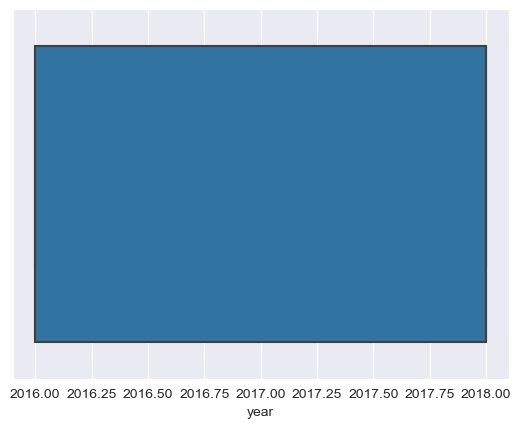

In [12]:
#boxplot for year variable
sns.boxplot(x = train['year']);

we notice that there are not outliers in the year column since all our data is within the lower and upper limit

In [13]:
#check for outliers in household_size columnusing the interquatile range calculation
Q1, Q3 = np.percentile(train['household_size'], [25,75]) 
IQR = Q3-Q1 
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -4.0
up_limit is 12.0


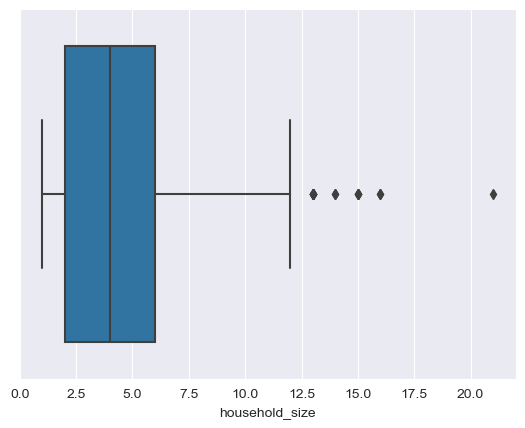

In [14]:
#box plot to investigate outliers in the dataset
sns.boxplot(x = train['household_size']);

We notice that household_size contains outliers from values that are above 12. Considering that this is an African setup, we can have homes that have a house hold size of more than 20 especially the polygamous homes. We will therefore not drop the outliers

In [15]:
#check for outliers in age_of_respondent columnusing the interquatile range calculation
Q1, Q3 = np.percentile(train['age_of_respondent'], [25,75]) 
IQR = Q3-Q1 
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -10.0
up_limit is 86.0


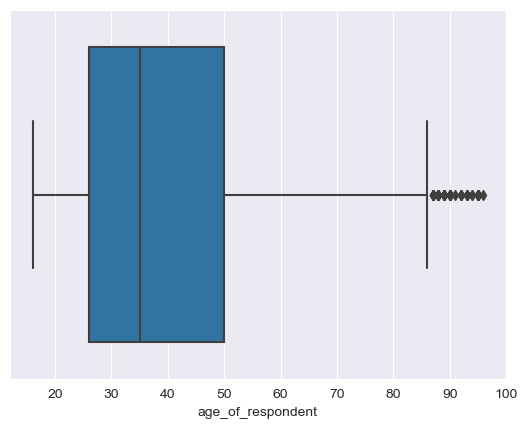

In [16]:
#checking for outliers in the age_of_respondent column usig a boxplot
sns.boxplot(x = train['age_of_respondent']);

Ages above 86 are seen to be outliers.We will not drop the outlier since there few people who can live beyond 86 years in Africa

### 3.0 Explorartory Data Analysis

#### 3.1 Univariate Data Analysis

We will begin with checking the distribution of the bank_account, our target variable.

In [17]:
#do a value counts on the bank_account column
train['bank_account'].value_counts(normalize=True)

No     0.79336
Yes    0.20664
Name: bank_account, dtype: float64

Below is a barplot to show the class balancing in our target variable

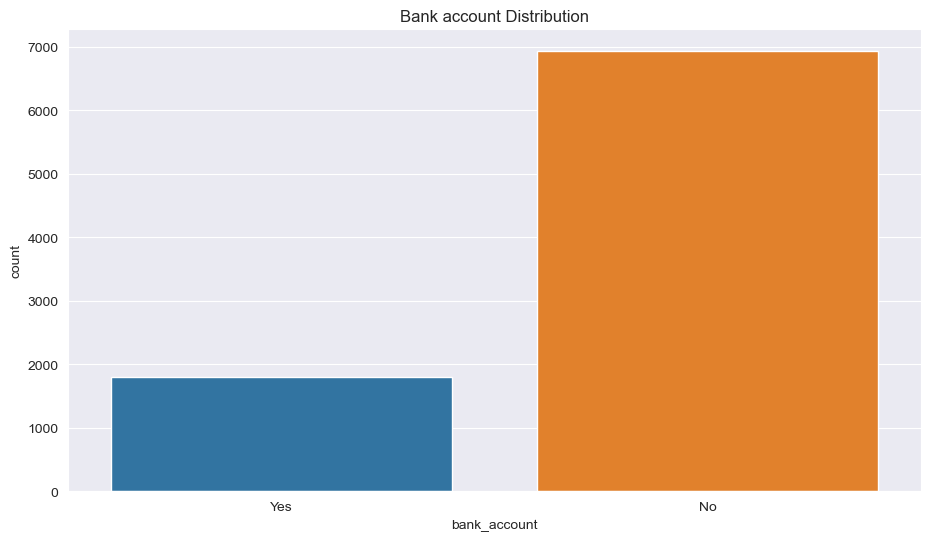

In [18]:
#plot a count plot on the bank_account column
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='bank_account')
plt.title("Bank account Distribution");

We notice a class imbalance in our target variable. The 'Yes' class is 21% and the 'No' class is 79% of the whole data set.

##### Study the distribution of Countries in the data set

In [19]:
#do a value counts on the bank_account column
train['country'].value_counts(normalize=True)

Kenya     0.694677
Rwanda    0.305323
Name: country, dtype: float64

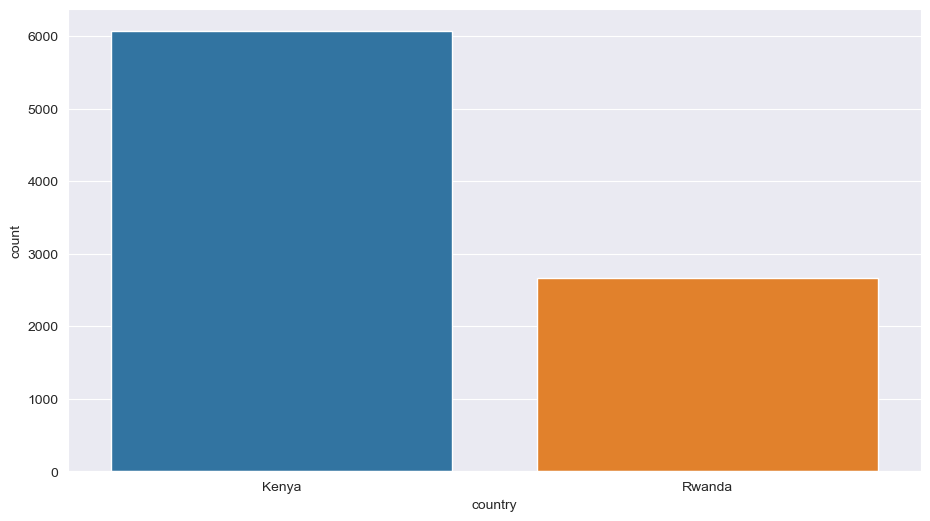

In [20]:
#check the distribution of countries in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='country');

We observe that that we have two countries-Kenya and Rwanda. Kenya has the majority entries of of 70%  while Rwanda has about 30%

##### Check the distribution of gender in the dataset using a countplot

In [21]:
#check value_counts for the gender_of_respondent column
train['gender_of_respondent'].value_counts(normalize=True)

Female    0.579851
Male      0.420149
Name: gender_of_respondent, dtype: float64

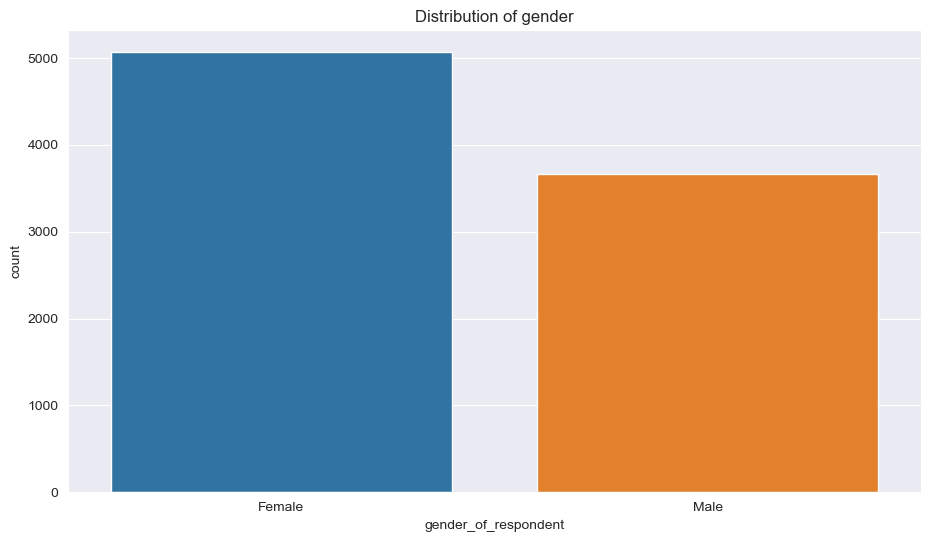

In [22]:
#check the distribution of coutries in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='gender_of_respondent')
plt.title("Distribution of gender");

We notice that we have slightly more females than the males in the dataset 58% to 42% respectively

##### Investigate the distribution of age in the dataset using a histogram

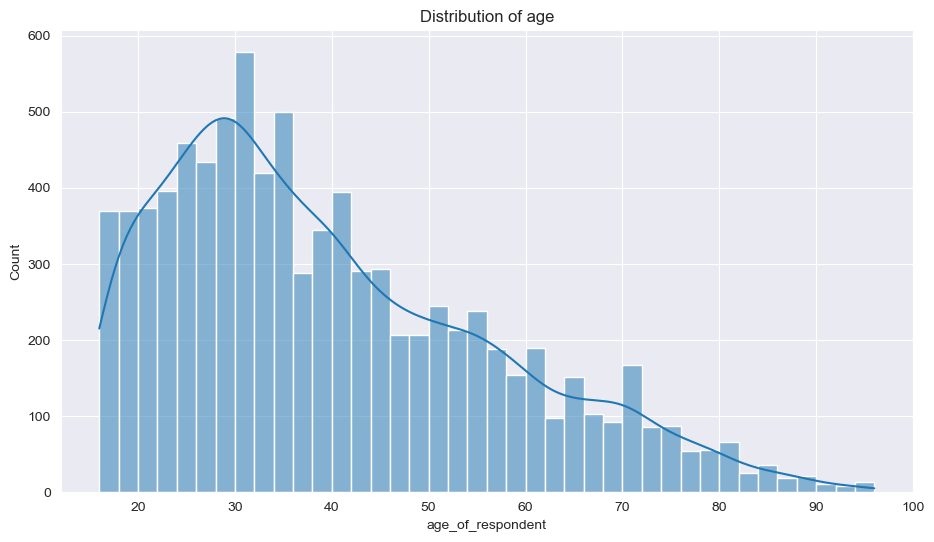

In [23]:
#check the distribution of age_of_respondent' in the dataset
plt.figure(figsize=(11,6))
sns.histplot(data=train, x='age_of_respondent', bins=40,kde=True)
plt.title("Distribution of age");

We notice that most people are between the age of 15 and 70. Very few people are between the ages of 80 and 96

##### Check the distribution of education level using a countplot

In [24]:
#check value_counts for the education_level column
train['education_level'].value_counts(normalize=True)

Primary education                  0.463995
Secondary education                0.255867
No formal education                0.186377
Vocational/Specialised training    0.053005
Tertiary education                 0.039038
Other/Dont know/RTA                0.001717
Name: education_level, dtype: float64

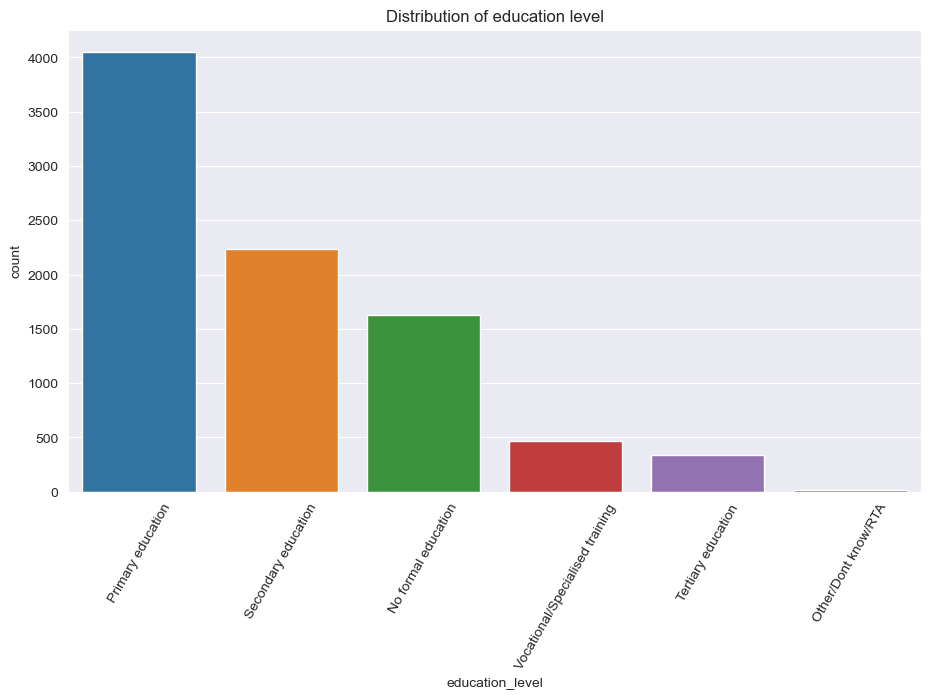

In [25]:
#check the distribution of education_level in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='education_level', order = train['education_level'].value_counts().index)
plt.xticks(rotation=60)
plt.title("Distribution of education level");


We notice that most people have primary education only(43%), 25% have a seconaday education,  5% have aVocational/Specialised training, 18% have No formal education.

##### Check the distribution of location type

In [26]:
#check value_counts for the location_type column
train['location_type'].value_counts(normalize=True)

Rural    0.670177
Urban    0.329823
Name: location_type, dtype: float64

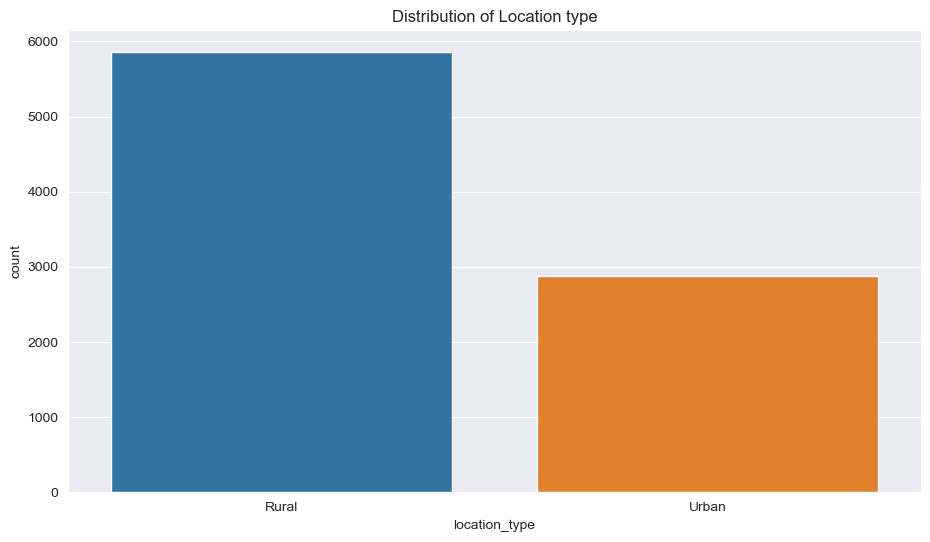

In [27]:
#plot a countplot of the distribution of location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='location_type')
plt.title("Distribution of Location type");

We observe that there are more people  residing in rural areas compared to those in urban areas

##### Check the distribution of cell phone access in the dataset

In [28]:
#check value_counts for the location_type column
train['cellphone_access'].value_counts(normalize=True)

Yes    0.799771
No     0.200229
Name: cellphone_access, dtype: float64

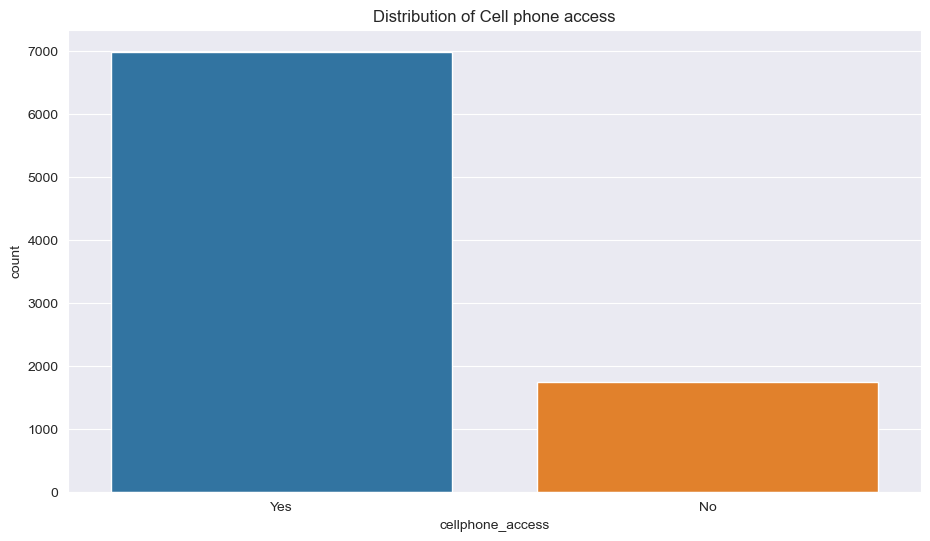

In [29]:
#plot a countplot of the distribution of location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='cellphone_access')
plt.title("Distribution of Cell phone access");

From the above plot we not that most people have access to a cell phone(80%)

##### Check the distribution of household size

In [30]:
#check value_counts for the household_sizee column
train['household_size'].value_counts(normalize=True)

4     0.174242
3     0.165426
5     0.142645
1     0.133715
2     0.128220
6     0.108185
7     0.071093
8     0.039611
9     0.021065
10    0.008930
11    0.003091
12    0.001832
13    0.000916
15    0.000458
16    0.000229
14    0.000229
21    0.000114
Name: household_size, dtype: float64

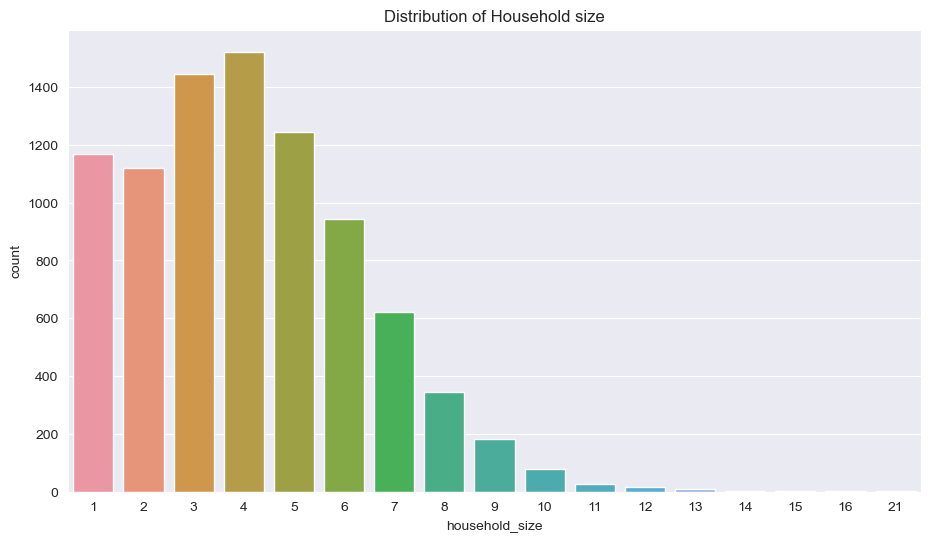

In [31]:
#plot a countplot of the distribution of location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='household_size')
plt.title("Distribution of Household size");

We notice that most people have a household size of between 1 and 7 , 4 is the highest while 21 has the smallest count

#### 3.2 Bivariate Data Analysis

Here we check how various features relate to each other

##### Check the distribution of bank_account in different countries

In [32]:
#perform a groupby on country and bank_account column
train.groupby(['country', 'bank_account'])['bank_account'].count()

country  bank_account
Kenya    No              4547
         Yes             1521
Rwanda   No              2383
         Yes              284
Name: bank_account, dtype: int64

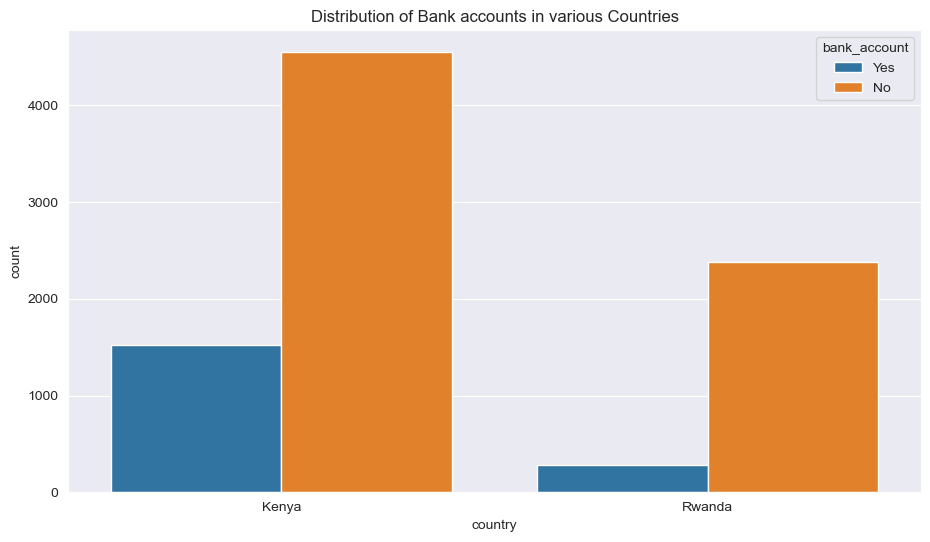

In [33]:
#check the distribution of coutries in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='country', hue='bank_account',  order = train['country'].value_counts().index)
plt.title("Distribution of Bank accounts in various Countries");

We notice that Kenya has more people with bank accounts (about 1500)compared to Rwanda that has only about 300 people. This is also because of the sample collected from Kenya is larger that collected in Rwanda.

##### Check the distribution of bank_account ownership in relation to gender and country

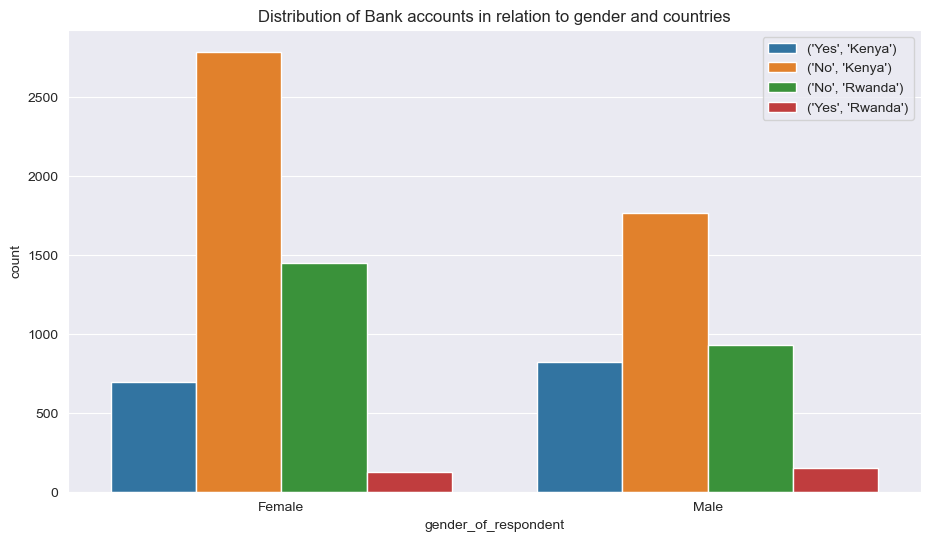

In [34]:
#check the distribution of bank_account in relation to gender_of_respondent in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='gender_of_respondent', hue=train[['bank_account','country']].apply(tuple, axis=1),  order = train['gender_of_respondent'].value_counts().index)
plt.title("Distribution of Bank accounts in relation to gender and countries");

We note that we have more males with bank accounts compared to female in Kenya. Rwandwa has an almost equal number for both males and females owning bank accounts.
The number of females who do not have bank accounts for both Kenya and Rwanda is higher than that of males


##### Investigate the distribution of of bank accounts in relation to education level

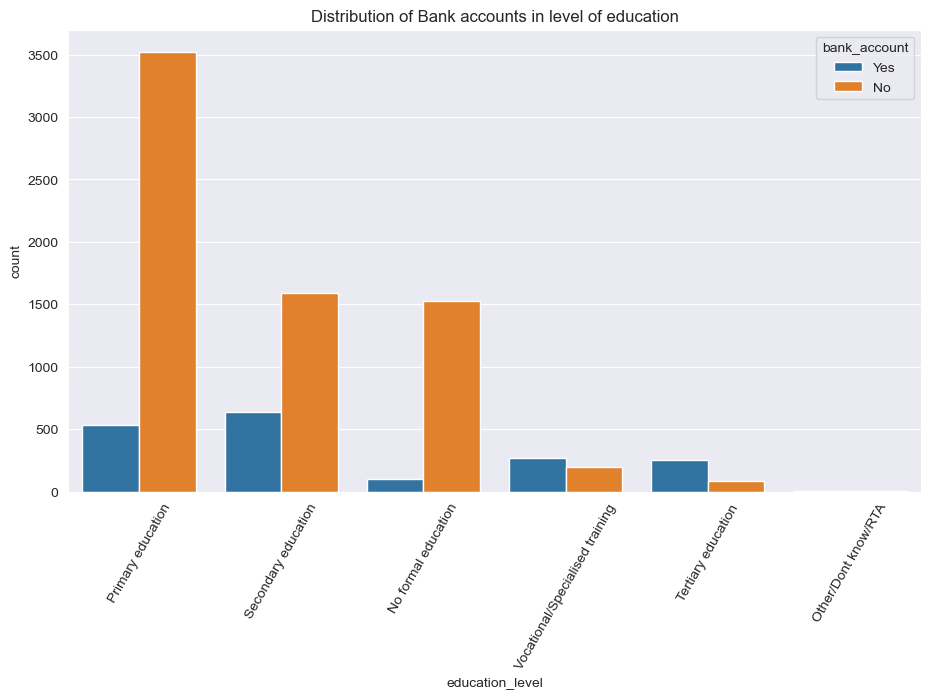

In [35]:
#check the distribution of coutries in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='education_level', hue='bank_account',  order = train['education_level'].value_counts().index)
plt.xticks(rotation=60)
plt.title("Distribution of Bank accounts in level of education");

We note that people with secondary education have more bank accounts followed by people with primary education.
People with tertiary anmd specialed education also have more bank accounts compared to the total number of people in these two category.
people with no formal education have fewest bank accounts.


##### Check the distribution of bank account ownership in relation to location type

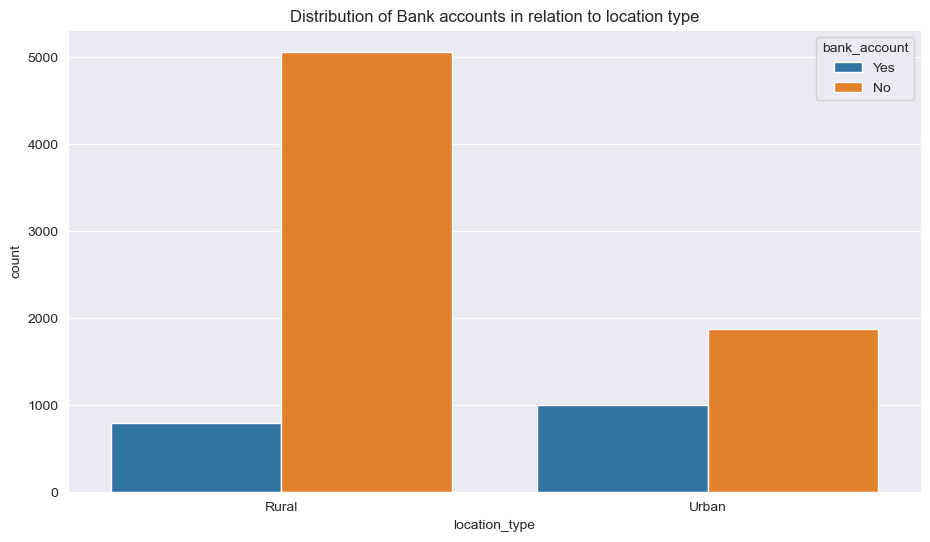

In [36]:
#check the distribution of bannk acconts amongst location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='location_type', hue='bank_account',  order = train['location_type'].value_counts().index)
plt.title("Distribution of Bank accounts in relation to location type");

We have a higher number of people with bank accounts in the urban ares compare to people staying in rural areas

##### Investigate whether people with access to cell pones have bank accounts

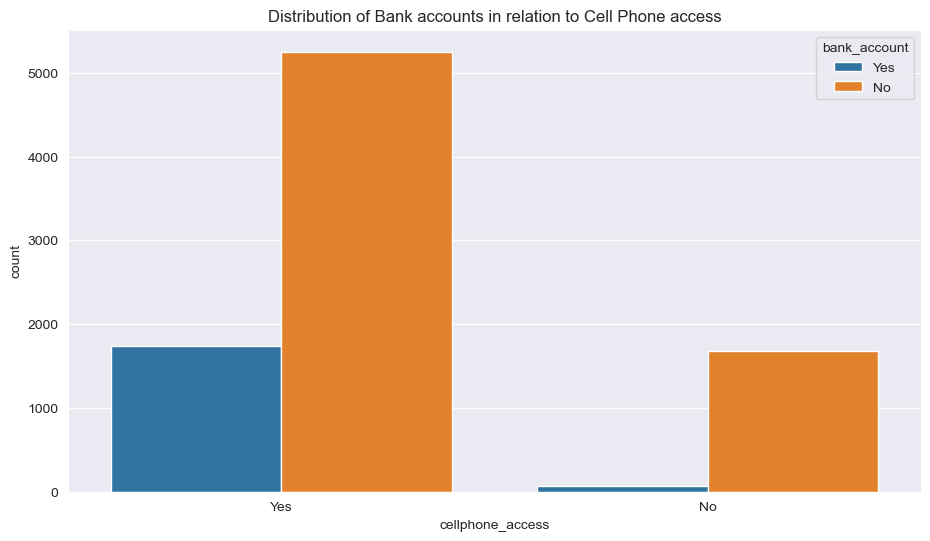

In [37]:
#check the distribution of bank accounts in relation to cell phone access in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='cellphone_access', hue='bank_account',  order = train['cellphone_access'].value_counts().index)
plt.title("Distribution of Bank accounts in relation to Cell Phone access");

we have a slightly higer number(about 1800) of people with that have cell phones and have a bank account compared to those that dont have access to a cell phone(about 50 people).

##### Check which location has the highest number of cell phone access

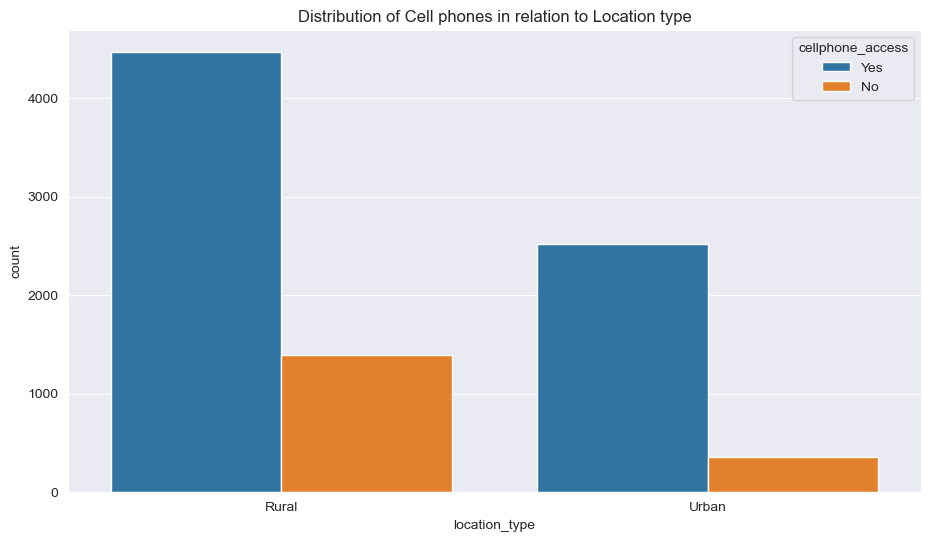

In [38]:
#check the distribution of cell phone  access in relation to location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='location_type', hue='cellphone_access',  order = train['location_type'].value_counts().index)
plt.title("Distribution of Cell phones in relation to Location type");

We notice that we have a higher number of people with cell phones in the rural areas compared to urban areas.We also notice that we have a higher number of people without cell phones in rural settlement compared to urban settlement. This is informed by the fact that we have more people staying in the rural area compare to urban area. 

##### Investigate where people with large families stay

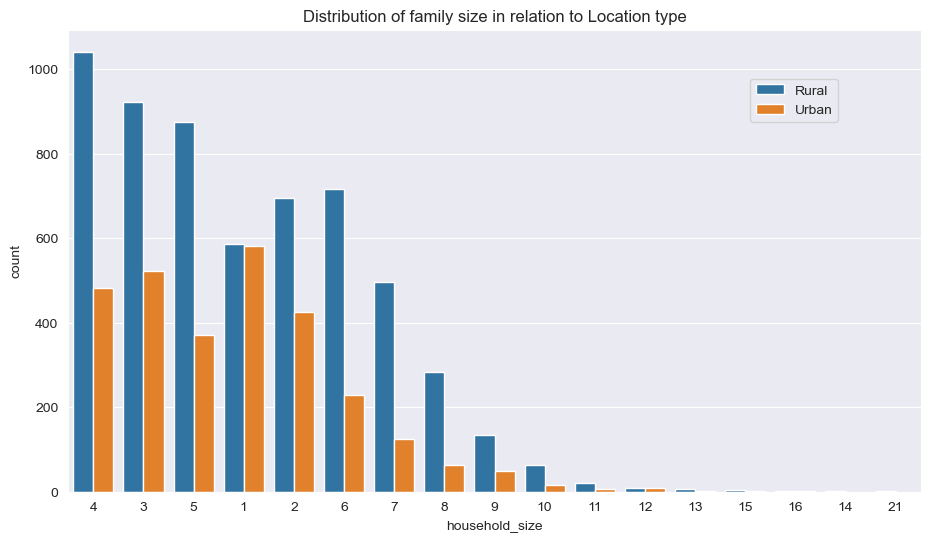

In [39]:
#check the distribution of household_size amongst location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='household_size', hue='location_type',  order = train['household_size'].value_counts().index)
plt.title("Distribution of family size in relation to Location type")
plt.legend(loc=(0.8,0.8));

We note that the distribution of people with a family size of one is equal in both rural and urban setup.
In other family sizes, we see that most people stay in rural areas compared to urban areas

##### Check the distribution of household size in  in relation to bank account ownership

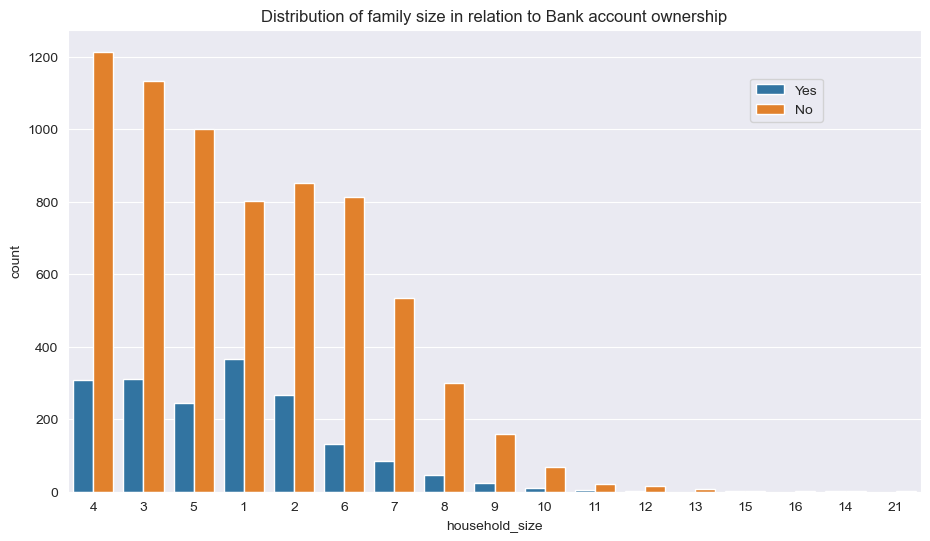

In [40]:
#check the distribution of household_size inrelation to bank_account
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='household_size', hue='bank_account',  order = train['household_size'].value_counts().index)
plt.title("Distribution of family size in relation to Bank account ownership")
plt.legend(loc=(0.8,0.8));

Family size of 1 has the highest number of people owning a bank account followed by family size 4 and 3, then 2

##### Inspect the marital status in the household size

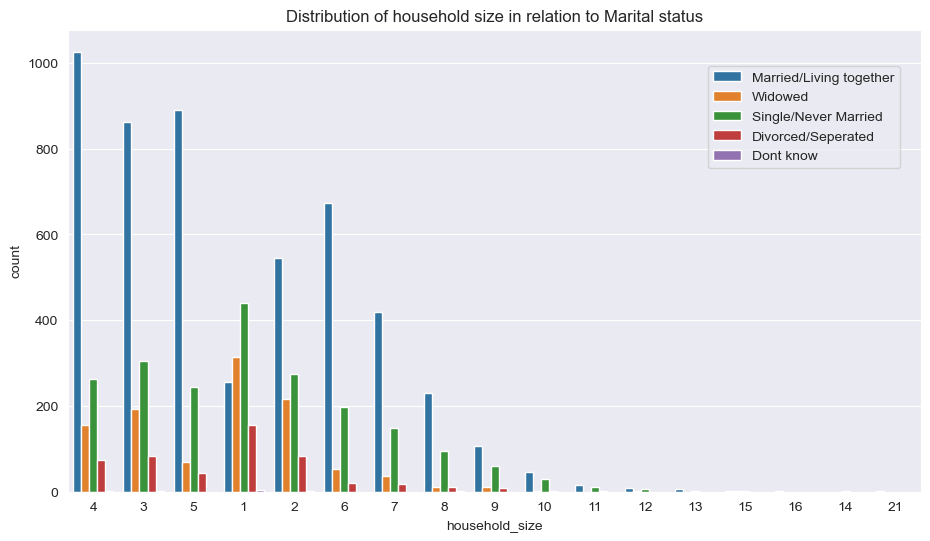

In [41]:
#check the distribution of household_size inrelation to marital status
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='household_size', hue='marital_status',  order = train['household_size'].value_counts().index)
plt.title("Distribution of household size in relation to Marital status")
plt.legend(loc=(0.75,0.7));

We note that most people various households are married/living together, followed by single/never married,  windowed  then divorced/separated.

Genarally we have household size of 4 with the highest number of married people the 5, 3,6, 2, the lowest is 12.

We also note that a household size of 1 has married category.This may imply that some married couples live in separate places

##### Check the distribution of the Marital Status of the respondents in relation to back account owernership

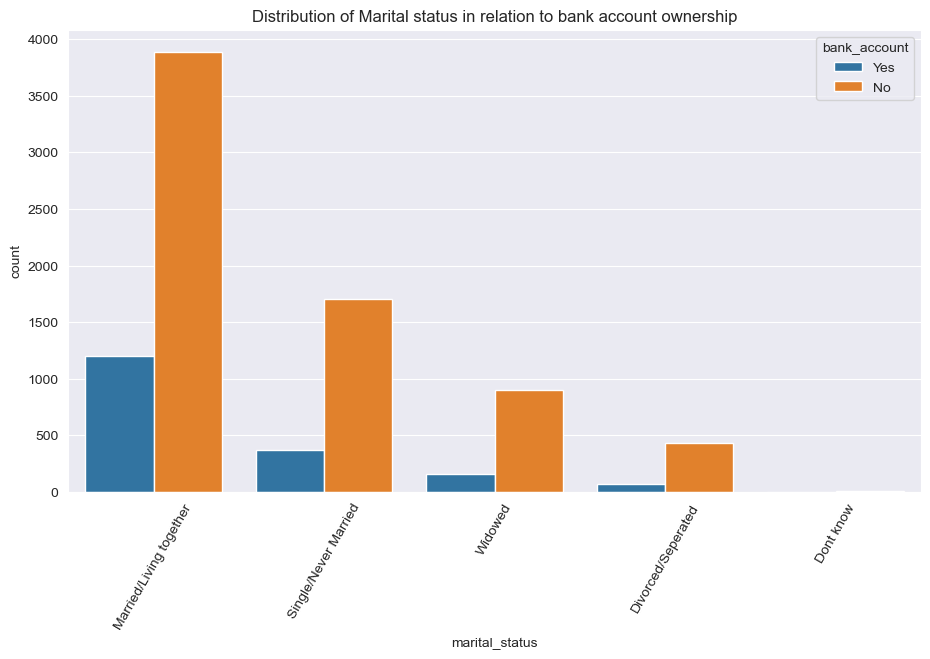

In [42]:
#check the distribution of marital_status inrelation to bank_account
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='marital_status', hue='bank_account',  order = train['marital_status'].value_counts().index)
plt.title("Distribution of Marital status in relation to bank account ownership")
plt.xticks(rotation=60);

The highest bank accounts are owned by married couples while divorced or separated have the least
Generally most people do not own bank accounts regardless of their marital staus.

##### Check the distribution of the age of the respondents in relation to bank account owernership

From the univariate anlysis of the age_of_respondent column, we notice that we have a much larger number of unique values(81) so it will be difficult to plot a count plot of its distribution in relation to bank account ownership.

To handle this, we will create a new column called age_bands off of the age_of_respondent column using pandas cut method to bin the values then make visualization from it

In [43]:
# create bins with a width of 20
plt.figure(figsize=(11,6))
bins = [1, 20, 40, 60, 80, 100]
# create labels for each bin
labels = ['[1, 20]', '[21, 40]', '[41, 60]', '[61, 80]', '[81, 100]']
# use cut to group the ages into the bins 
train['age_bands'] = pd.cut(train['age_of_respondent'], bins=bins, labels=labels);

<Figure size 1100x600 with 0 Axes>

In [44]:
#confirm that the age bands have been created
train['age_bands'].value_counts()

[21, 40]     4351
[41, 60]     2289
[61, 80]     1001
[1, 20]       949
[81, 100]     145
Name: age_bands, dtype: int64

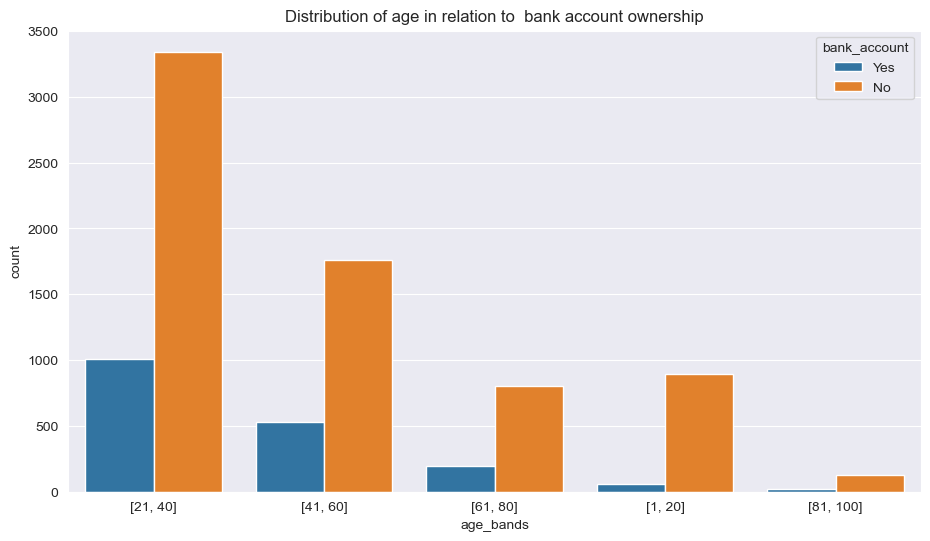

In [45]:
#plot distribution of age in relation to  bank account ownership
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='age_bands', hue='bank_account', order = train['age_bands'].value_counts().index);
plt.title("Distribution of age in relation to  bank account ownership");

We note that people between the ages of 21 and 40 have the highest number of bank account ownership followed by people between ages of 41 and 60

### 4.0 Feature Engineering

In this section we preprocess the data to ready it for modeling. This involves separating the target variable from the features,
converting categorical columns to numerical,feature selection and scaling of the data.

##### separate independent features from target variable(bank_account)

In [46]:

#get the target variable
y = train['bank_account']
#get predictor features.
#we will also drop the uniqueid since it will not help in our prediction.its just a unique counter of our features
X = train.drop(['bank_account', 'uniqueid'], axis=1)

In [47]:
#check the shape of X and y
print("y shape:", y.shape)
print("X shape:", X.shape)

y shape: (8735,)
X shape: (8735, 12)


We have one column in y column our target variable and 12 columns in X our predictor features. Both X and y have 8735 rows

From our EDA, we notice that most of our columns including our target variable are in categrical format. We have to convert them to numerical for us to be able to perform modeling

##### convert the target variable(bank_account) to numerical type
Our target variable currently has two categories:-yes and no. We need to convert these int 1 for yes and 0 for no using Label Encoding technique


In [48]:
#import the LabelEcoder
from sklearn.preprocessing import LabelEncoder

# instantaite the Label enconder
le = LabelEncoder()
#fit and transform the target column
y = le.fit_transform(y)
#preview the bank_account column to confirm the changes
y

array([1, 0, 1, ..., 0, 0, 0])

##### convert the categorical features into numerical type

We will first select features that categorical then convert them into numerical, convert integer columns to float types then concatenate them with the features that are already numerical

In [49]:
#get numeric columns 
numeric_cols =  X._get_numeric_data()
#convert them to float type
numeric_cols_to_float = numeric_cols.astype('float')
#preview to confirm changes
numeric_cols_to_float.head()

,year,household_size,age_of_respondent
0,2018.0,3.0,24.0
1,2018.0,5.0,70.0
2,2018.0,5.0,26.0
3,2018.0,5.0,34.0
4,2018.0,8.0,26.0


In [58]:
#check the shape of the numeric_cols_to_float dataframe
numeric_cols_to_float.shape

(8735, 3)

In [51]:
#get categorical columns 
categoricals = X.select_dtypes(include="object")
# we will use methods use mapping and pandas get dummies to convert categorical columns into numerical formats.
# we will loop through categorical if the value counts is more than 2 we use pd.get_dummies, if its 2 and has ordinal
#properties we will use ordinal encoding
ordinals = []
cats = []
for col in categoricals:
    if all(x in ["Yes","No", "Female","Male", "Urban","Rural"] for x in X[col].unique()):
        ordinals.append(col)
    else:
        cats.append(col)
#preview ordinals and categoricals
print("Ordinal columns:", ordinals)
print("categorical columns:", cats)

Ordinal columns: ['location_type', 'cellphone_access', 'gender_of_respondent']
categorical columns: ['country', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']


In [52]:
# #convert the ordinals using ordinal encoding
# import label encoder
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
le = LabelEncoder()

# fit and transform ordinal data using label encoder
encoded_ordinals = X[ordinals].apply(le.fit_transform)

# preview the changes
encoded_ordinals.head()

,location_type,cellphone_access,gender_of_respondent
0,0,1,0
1,0,0,0
2,1,1,1
3,0,1,0
4,1,0,1


In [53]:
#check the shape of the ordinal dataframe
encoded_ordinals.shape

(8735, 3)

In [54]:
#convert the cateogrical columns using pandas get_dummies
encoded_cats = pd.get_dummies(X[cats], prefix_sep="_", drop_first=True)
#preview the changes
encoded_cats.head()

,country_Rwanda,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,...,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
##check the shape of the cats dataframe
encoded_cats.shape

(8735, 23)

In [56]:
#combine the numerical, ordinal and the one-hote encoded dataframes into 1 X

X = pd.concat([encoded_cats, numeric_cols_to_float, encoded_ordinals], axis=1)
#preview X
X.sample(5)

,country_Rwanda,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,...,job_type_Informally employed,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,year,household_size,age_of_respondent,location_type,cellphone_access,gender_of_respondent
14412,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,2016.0,2.0,38.0,0,1,1
1229,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,2018.0,5.0,42.0,0,0,0
13196,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2016.0,2.0,20.0,0,1,1
4437,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,2018.0,3.0,18.0,1,1,0
4869,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,2018.0,7.0,21.0,0,1,0


In [59]:
#confirm that our dataframe merging happened without issues
X.isnull().sum()

country_Rwanda                                     0
relationship_with_head_Head of Household           0
relationship_with_head_Other non-relatives         0
relationship_with_head_Other relative              0
relationship_with_head_Parent                      0
relationship_with_head_Spouse                      0
marital_status_Dont know                           0
marital_status_Married/Living together             0
marital_status_Single/Never Married                0
marital_status_Widowed                             0
education_level_Other/Dont know/RTA                0
education_level_Primary education                  0
education_level_Secondary education                0
education_level_Tertiary education                 0
education_level_Vocational/Specialised training    0
job_type_Farming and Fishing                       0
job_type_Formally employed Government              0
job_type_Formally employed Private                 0
job_type_Government Dependent                 

In [61]:
#check the shape of the dataframe
X.shape

(8735, 29)

In [ ]:
We see that the data frame concatenation went well as we do not have null values